In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import gymnasium as gym

from classes.QLearningAgentClass import QLearningAgent
from envs.createEnvs import createNNEnv
from utilities.plots import create_dicts_Qlearning, create_grids, plot_string_policy

In [3]:
env = createNNEnv()

Loading models...
Models loaded


In [4]:
# hyperparameters
learning_rate = 0.02
n_episodes = 20000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = QLearningAgent(env=env, learning_rate=learning_rate, initial_epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon)

In [5]:
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)

for episode in tqdm(range(n_episodes)):
    done = False
    obs, _ = env.reset()
    obs = tuple(obs)
    
    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, _, _ = env.step(action)
        next_obs = tuple(next_obs)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated
        obs = next_obs

    agent.decay_epsilon()

 12%|█▏        | 2402/20000 [05:35<41:00,  7.15it/s] 


KeyboardInterrupt: 

## Visualizing the training




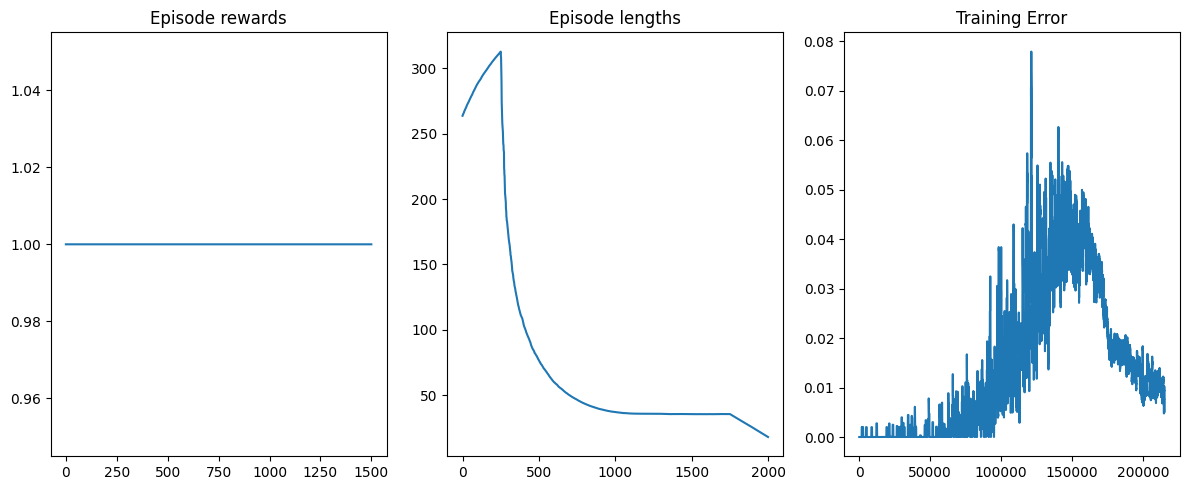

In [ ]:
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (np.convolve(np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid") / rolling_length)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)

# Add a red line at y = 9 to the right plot
# Actually the value should be 8, but it depends if you consider reaching the goal as a step on its own or not
#axs[1].axhline(y=9, color='red', linestyle='--', label='y=9')

axs[1].set_title("Episode lengths")
length_moving_average = (np.convolve(np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same") / rolling_length)
axs[1].plot(range(len(length_moving_average)), length_moving_average)

axs[2].set_title("Training Error")
training_error_moving_average = (np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same") / rolling_length)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)

plt.tight_layout()
plt.show()

## Visualising the policy



Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un maestro
Sos un mae

c:\Users\el_sa\anaconda3\envs\TFG\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.maze to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.maze` for environment variables or `env.get_wrapper_attr('maze')` that will search the reminding wrappers.
  logger.warn(


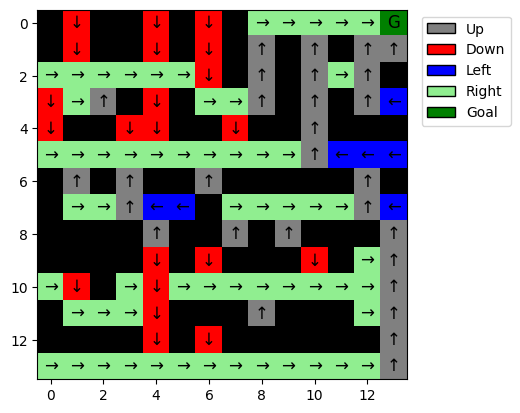

In [ ]:
# state values & policy with usable ace (ace counts as 11)
state_value_dict, policy_dict = create_dicts_Qlearning(agent)
value_grid, policy_grid, string_policy_grid = create_grids(state_value_dict, policy_dict, env)

fig = plot_string_policy(string_policy_grid)
plt.show()